# Projekt: Kundensegmentierung mittels K-Means Clustering


### Ziel
Das Ziel dieses Projekts ist es, Kunden des Einkaufszentrums in verschiedene Segmente zu unterteilen, um gezielte Marketingstrategien entwickeln zu können.

### Daten
CustomerID: Eindeutige Kunden-ID

Gender: Geschlecht des Kunden

Age: Alter des Kunden

Annual Income (k$): Jährliches Einkommen des Kunden in Tausend Dollar

Spending Score (1-100): Ausgaben-Score, der das Kaufverhalten der Kunden bewertet


In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly.graph_objects as go

In [36]:
# Set environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

C:\Users\julie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\julie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\julie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\julie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

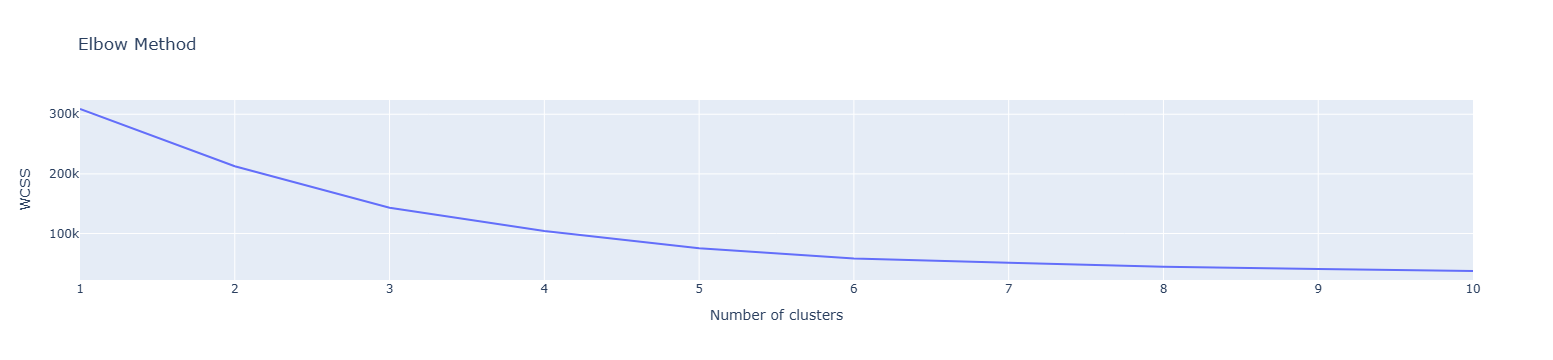

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
fig = px.line(x=range(1, 11), y=wcss, labels={'x': 'Number of clusters', 'y': 'WCSS'}, title='Elbow Method')
fig.show()

In [39]:
# Applying k-means to the dataset with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\julie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



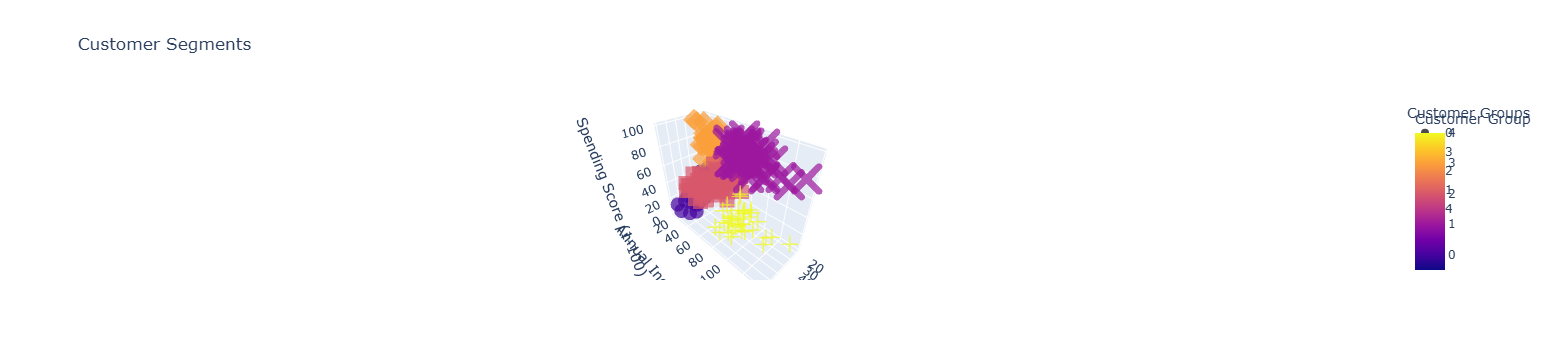

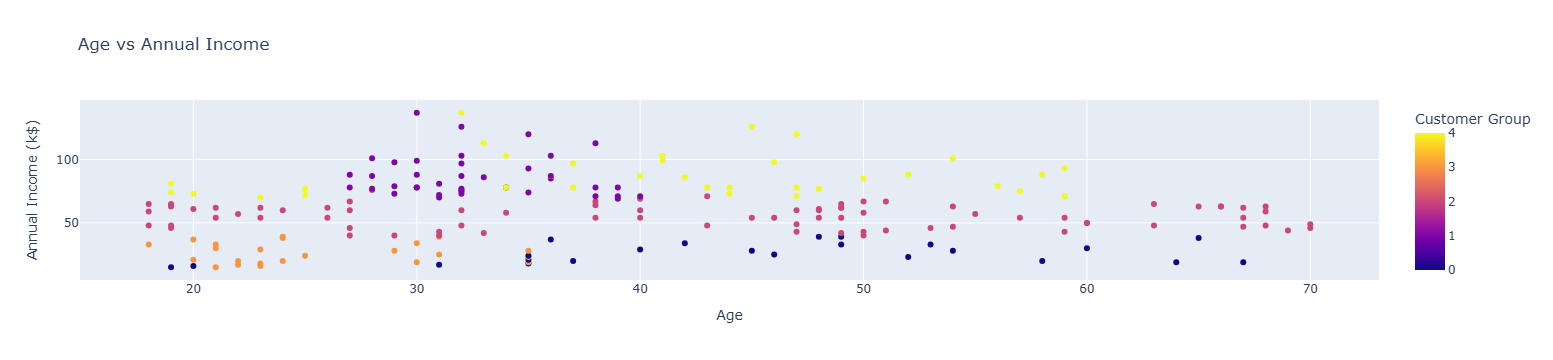

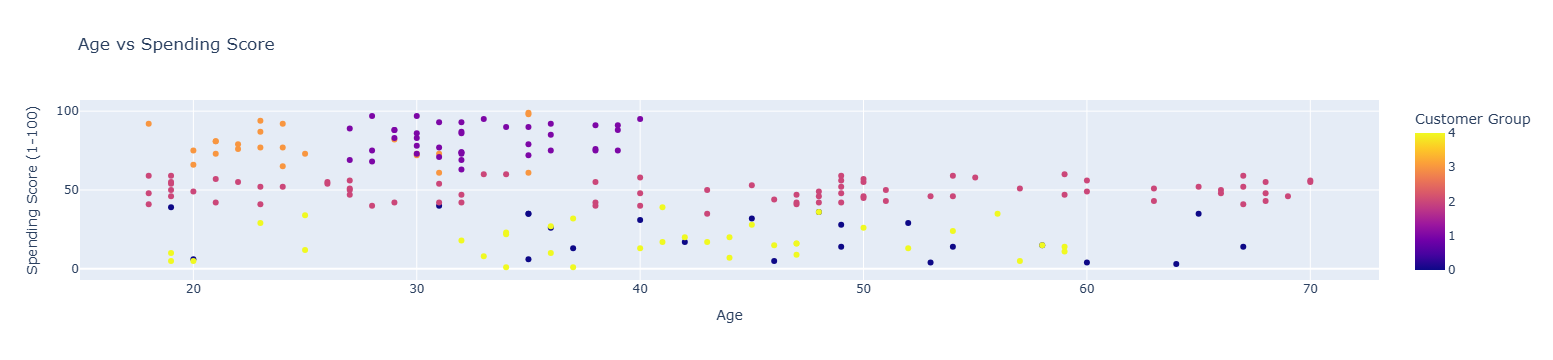

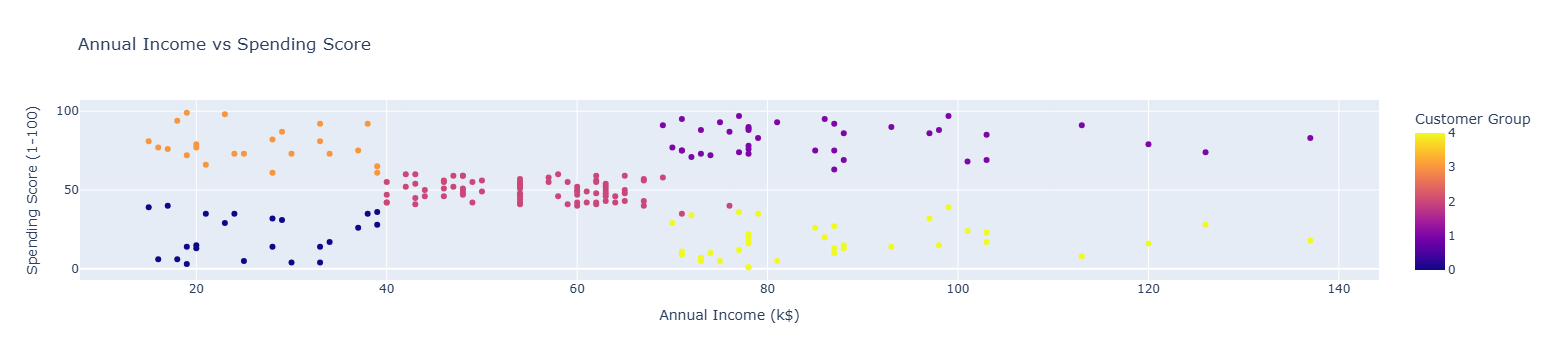

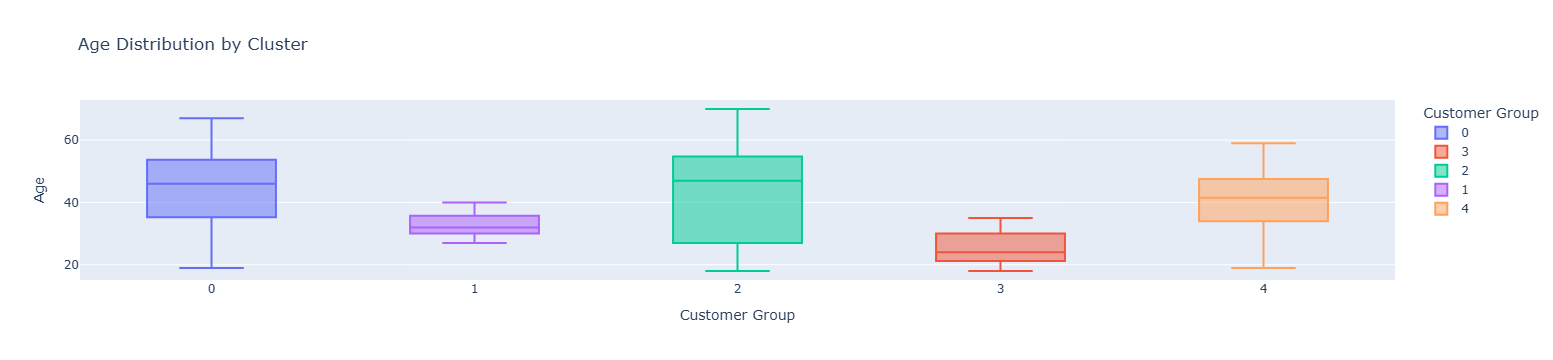

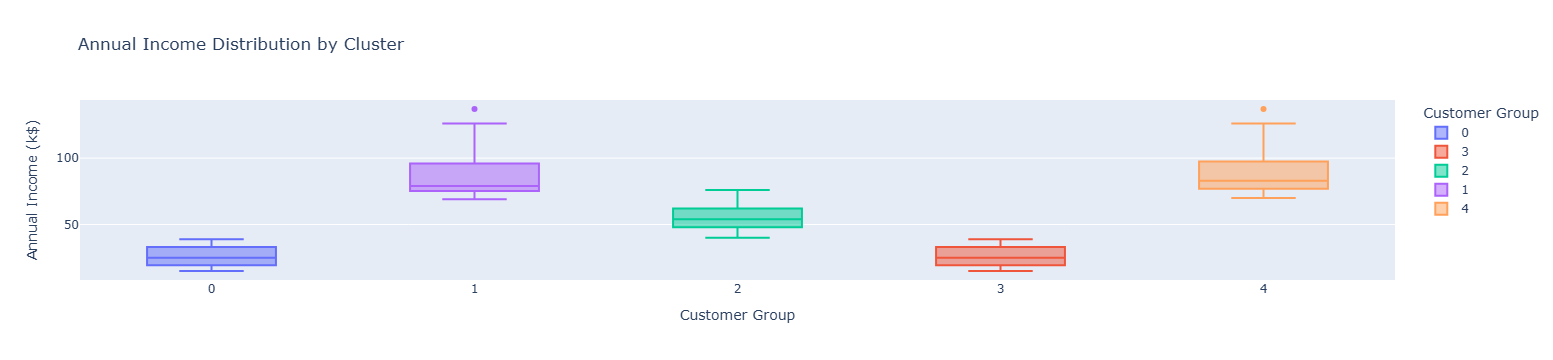

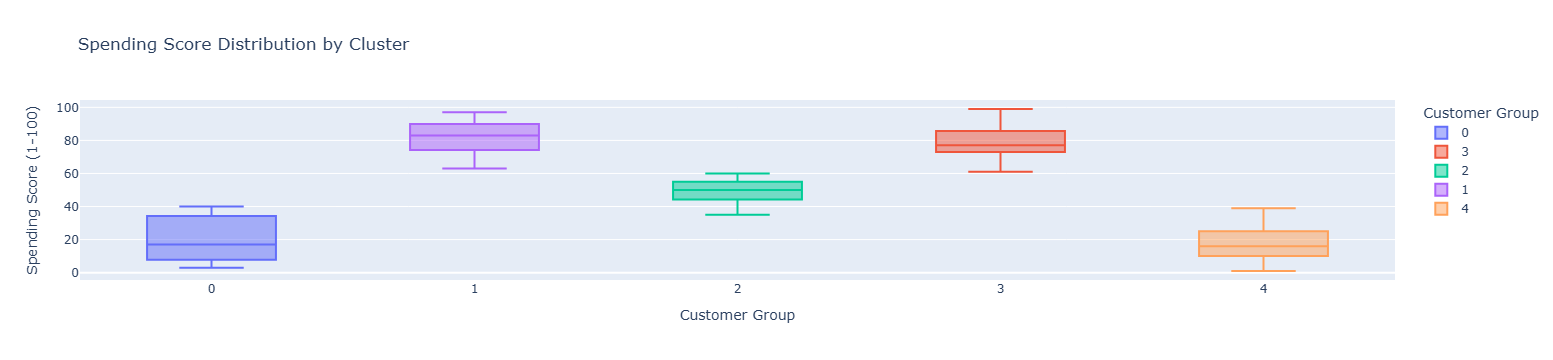

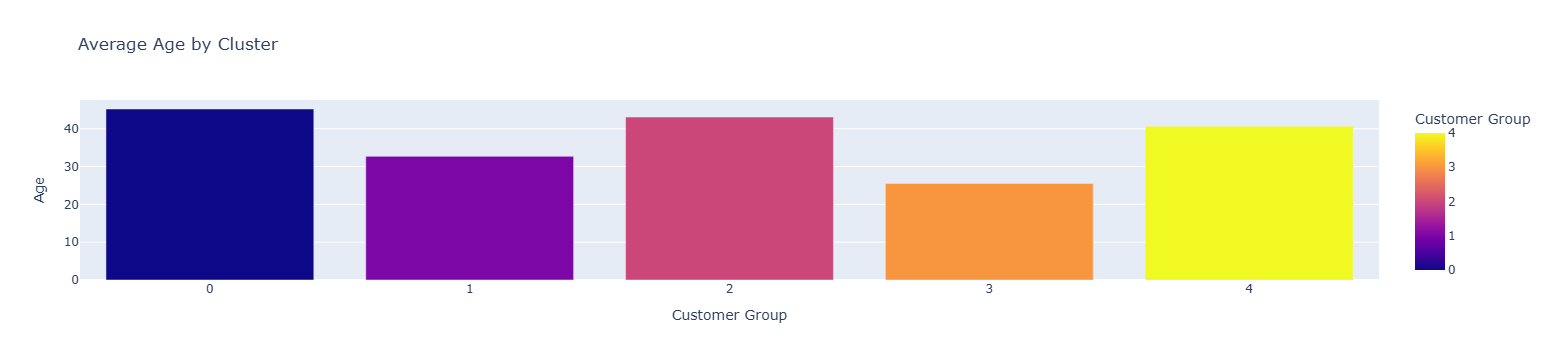

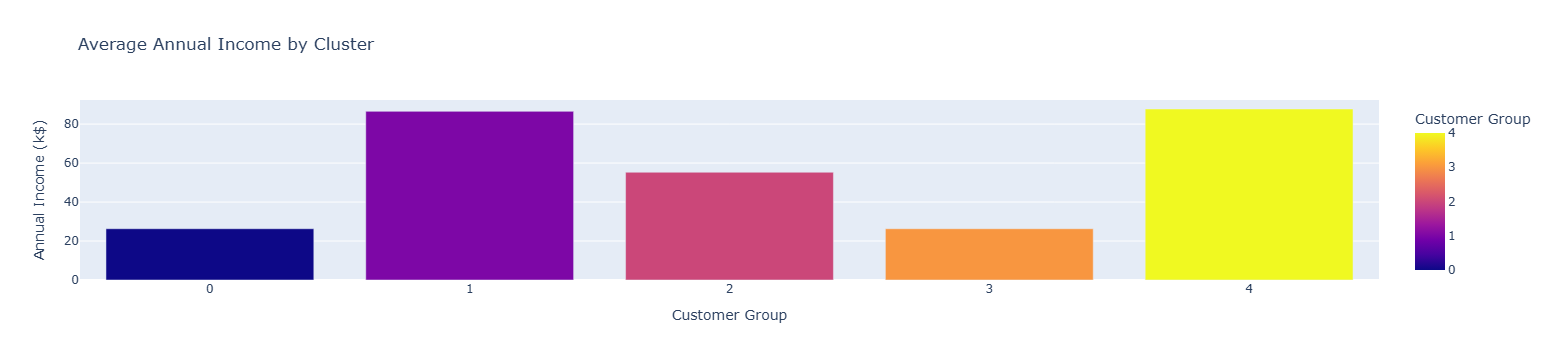

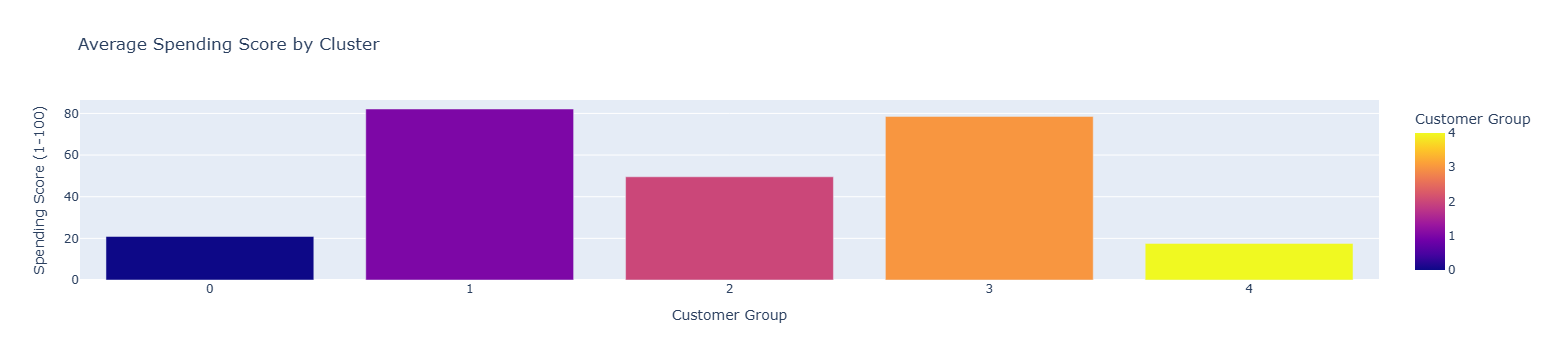

In [40]:
# Adding the cluster information to the original dataframe
data['Cluster'] = y_kmeans

# Plotting all the clusters and their centroids in 3D
fig_3d = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                       color='Cluster', symbol='Cluster', size_max=18, opacity=0.7,
                       title='Customer Segments', labels={'Cluster': 'Customer Group'})
fig_3d.update_layout(legend=dict(title='Customer Groups'))
fig_3d.show()

# 2D scatter plots for each combination of features
fig_2d_age_income = px.scatter(data, x='Age', y='Annual Income (k$)', color='Cluster',
                               title='Age vs Annual Income', labels={'Cluster': 'Customer Group'})
fig_2d_age_income.show()

fig_2d_age_spending = px.scatter(data, x='Age', y='Spending Score (1-100)', color='Cluster',
                                 title='Age vs Spending Score', labels={'Cluster': 'Customer Group'})
fig_2d_age_spending.show()

fig_2d_income_spending = px.scatter(data, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster',
                                    title='Annual Income vs Spending Score', labels={'Cluster': 'Customer Group'})
fig_2d_income_spending.show()

# Box plots for the distribution of features within each cluster
fig_box_age = px.box(data, x='Cluster', y='Age', color='Cluster',
                     title='Age Distribution by Cluster', labels={'Cluster': 'Customer Group'})
fig_box_age.show()

fig_box_income = px.box(data, x='Cluster', y='Annual Income (k$)', color='Cluster',
                        title='Annual Income Distribution by Cluster', labels={'Cluster': 'Customer Group'})
fig_box_income.show()

fig_box_spending = px.box(data, x='Cluster', y='Spending Score (1-100)', color='Cluster',
                          title='Spending Score Distribution by Cluster', labels={'Cluster': 'Customer Group'})
fig_box_spending.show()

# Bar plots for the average values of features for each cluster
# Include the 'Cluster' column and then exclude non-numeric columns for the mean calculation
numeric_data = data.drop(columns=['Gender', 'CustomerID'])
cluster_means = numeric_data.groupby('Cluster').mean().reset_index()

fig_bar_age = px.bar(cluster_means, x='Cluster', y='Age', color='Cluster',
                     title='Average Age by Cluster', labels={'Cluster': 'Customer Group'})
fig_bar_age.show()

fig_bar_income = px.bar(cluster_means, x='Cluster', y='Annual Income (k$)', color='Cluster',
                        title='Average Annual Income by Cluster', labels={'Cluster': 'Customer Group'})
fig_bar_income.show()

fig_bar_spending = px.bar(cluster_means, x='Cluster', y='Spending Score (1-100)', color='Cluster',
                          title='Average Spending Score by Cluster', labels={'Cluster': 'Customer Group'})
fig_bar_spending.show()

# Optional: Save the plots as HTML files
fig_3d.write_html("customer_segments_3d.html")
fig_2d_age_income.write_html("age_vs_income.html")
fig_2d_age_spending.write_html("age_vs_spending.html")
fig_2d_income_spending.write_html("income_vs_spending.html")
fig_box_age.write_html("age_distribution.html")
fig_box_income.write_html("income_distribution.html")
fig_box_spending.write_html("spending_distribution.html")
fig_bar_age.write_html("average_age.html")
fig_bar_income.write_html("average_income.html")
fig_bar_spending.write_html("average_spending.html")

## Fazit

Durch die Anwendung der K-Means Clustering-Methode konnten wir die Kunden des Einkaufszentrums erfolgreich in fünf unterschiedliche Segmente unterteilen. Jedes Segment zeigt charakteristische Merkmale in Bezug auf Alter, jährliches Einkommen und Ausgaben-Score.

Cluster 1: Kunden mit niedrigem Einkommen und mittlerem Ausgaben-Score.

Cluster 2: Kunden mit mittlerem Einkommen und hohem Ausgaben-Score.

Cluster 3: Junge Kunden mit hohem Einkommen und niedrigem Ausgaben-Score.

Cluster 4: Ältere Kunden mit hohem Einkommen und mittlerem Ausgaben-Score.

Cluster 5: Kunden mit hohem Einkommen und hohem Ausgaben-Score.


#### 3D-Streudiagramm der Cluster:

Was es zeigt: 
Dieses Diagramm zeigt die Verteilung der Kunden in einem 3D-Raum, basierend auf Alter, jährlichem Einkommen und Ausgaben-Score. Die verschiedenen Farben repräsentieren die verschiedenen Cluster.

Warum es wichtig ist: 
Es hilft uns, die räumliche Verteilung der Kunden zu visualisieren und zu verstehen, wie die Cluster in Bezug auf die drei Merkmale (Alter, Einkommen und Ausgaben-Score) verteilt sind.

#### 2D-Streudiagramme für jede Kombination von Merkmalen:

Was sie zeigen: Diese Diagramme zeigen die Verteilung der Kunden in 2D-Räumen für jede Kombination von zwei Merkmalen (z.B. Alter vs. Einkommen, Alter vs. Ausgaben-Score, Einkommen vs. Ausgaben-Score).

Warum sie wichtig sind: Sie helfen uns, die Beziehungen zwischen zwei Merkmalen zu visualisieren und zu verstehen, wie die Cluster in diesen Beziehungen verteilt sind.

#### Boxplots für die Verteilung der Merkmale innerhalb der Cluster:

Was sie zeigen: Diese Boxplots zeigen die Verteilung der einzelnen Merkmale (Alter, Einkommen, Ausgaben-Score) innerhalb jedes Clusters. Sie zeigen den Median, die Quartile und eventuelle Ausreißer.

Warum sie wichtig sind: Sie helfen uns, die Unterschiede in der Verteilung der Merkmale innerhalb der Cluster zu verstehen. Zum Beispiel können wir sehen, ob ein Cluster tendenziell ältere oder jüngere Kunden hat.


#### Balkendiagramme für die durchschnittlichen Werte der Merkmale pro Cluster:

Was sie zeigen: Diese Diagramme zeigen die durchschnittlichen Werte der einzelnen Merkmale (Alter, Einkommen, Ausgaben-Score) für jedes Cluster.

Warum sie wichtig sind: Sie bieten eine einfache Möglichkeit, die durchschnittlichen Eigenschaften der Kunden in jedem Cluster zu vergleichen. Zum Beispiel können wir sehen, welches Cluster im Durchschnitt das höchste Einkommen hat.